## Project1 Question 2 Assignment

# Connection between District and Vehicle electric range - sort between BEV & PHEV

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import zipfile

# Path to the zip file
zip_path = "Electric_Vehicle_Population_Data.xlsx.zip"
xlsx_file = "Electric_Vehicle_Population_Data.xlsx"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Open the xlsx file within the zip file
    with z.open(xlsx_file) as f:
        # Read the xlsx file into a DataFrame
        file_df = pd.read_excel(f)

print(file_df.head())

   VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  3C3CFFGE4E     Yakima   Yakima    WA      98902.0        2014    FIAT   
1  5YJXCBE40H   Thurston  Olympia    WA      98513.0        2017   TESLA   
2  3MW39FS03P       King   Renton    WA      98058.0        2023     BMW   
3  7PDSGABA8P  Snohomish  Bothell    WA      98012.0        2023  RIVIAN   
4  5YJ3E1EB8L       King     Kent    WA      98031.0        2020   TESLA   

     Model                   Electric Vehicle Type  \
0      500          Battery Electric Vehicle (BEV)   
1  MODEL X          Battery Electric Vehicle (BEV)   
2     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3      R1S          Battery Electric Vehicle (BEV)   
4  MODEL 3          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              87   
1            Clean Alternative Fuel Vehicle Eligible             200   
2 

In [33]:
# Check for duplicate VINs
duplicate_counts = file_df.groupby(['DOL Vehicle ID']).size().reset_index(name='counts')

# Filter out the combinations that appear more than once
duplicates = duplicate_counts[duplicate_counts['counts'] > 1]

print(duplicates)
# Zero duplicates found by DOL Vehicle ID

Empty DataFrame
Columns: [DOL Vehicle ID, counts]
Index: []


In [34]:
# Remove vehicles that show range equals 0
cleaned_df = file_df[file_df['Electric Range'] > 0]

len(cleaned_df)

83283

In [35]:
print(cleaned_df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


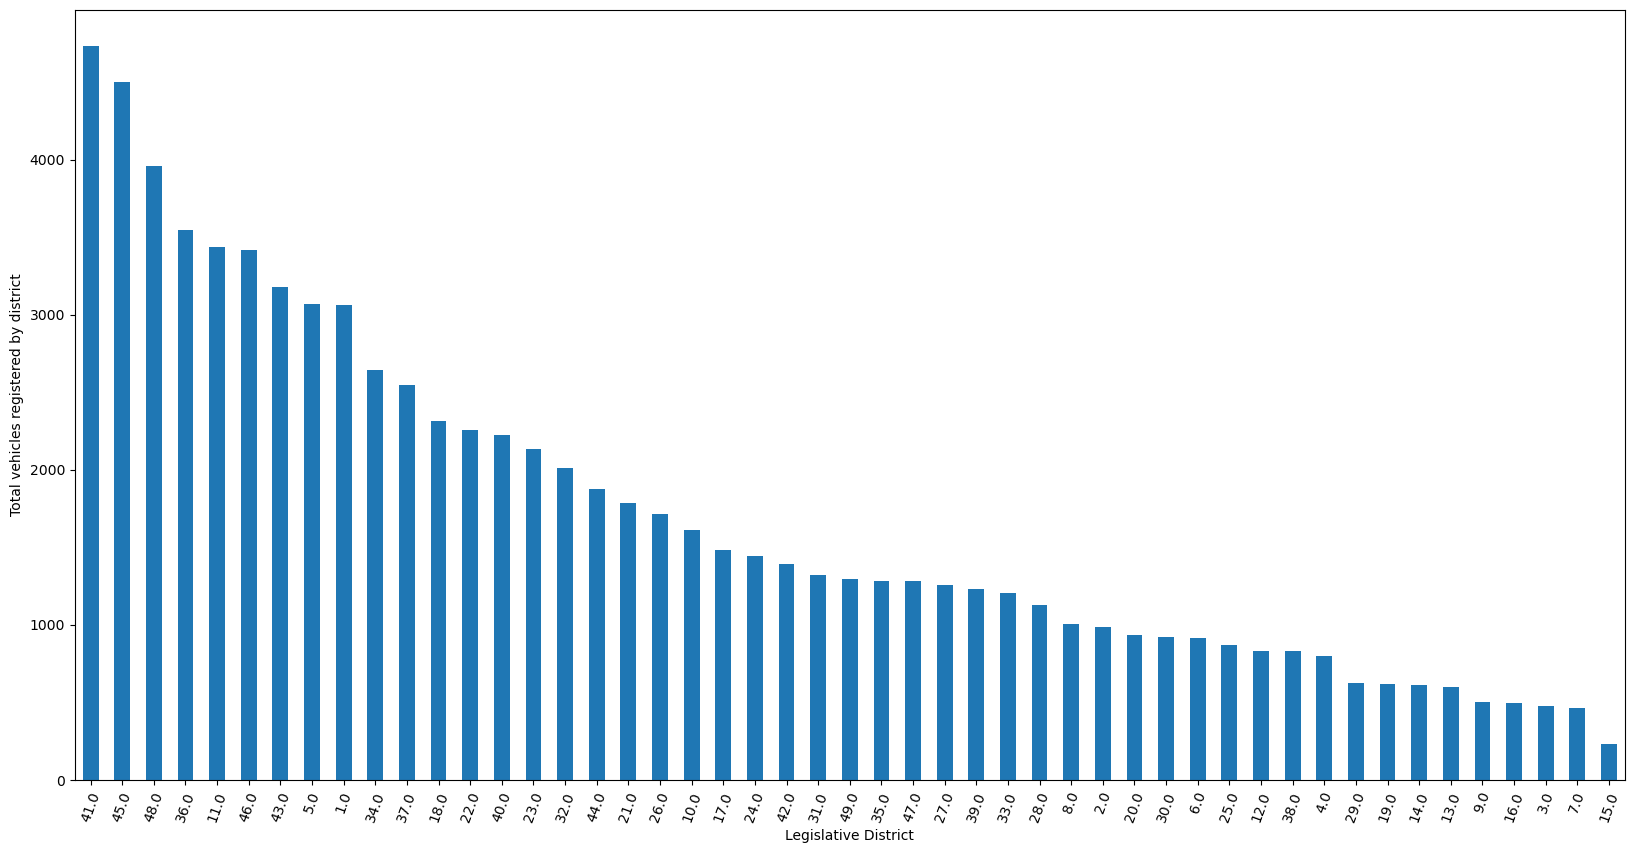

In [36]:
# Summarize the statistical info by legislative district
LD_index = cleaned_df['Legislative District'].value_counts()

# Create a bar plot
plt.figure(figsize=(20, 10))  
LD_index.plot(kind='bar', rot=70)

# Add labels and title
plt.xlabel('Legislative District')
plt.ylabel('Total vehicles registered by district')

plt.savefig("images/Total_veh_sales.png")

In [37]:
# Summarize the statistical info by legislative district
LD_df = cleaned_df.groupby('Legislative District')['Electric Range'].agg(['mean', 'median', 'var', 'std', 'sem'])

print(LD_df)


                            mean  median           var         std       sem
Legislative District                                                        
1.0                   138.942577   125.0  10169.941219  100.846126  1.821562
2.0                   110.562184    53.0   9775.701848   98.872149  3.143951
3.0                    99.872385    65.0   8307.386196   91.144864  4.168869
4.0                    91.625782    38.0   8685.758282   93.197416  3.297088
5.0                   138.868601   149.0  10224.802363  101.117765  1.825873
6.0                   104.639344    47.0   9521.618144   97.578779  3.225855
7.0                   114.620390    53.0  10162.549062  100.809469  4.695165
8.0                   113.649105    53.0  10175.338442  100.872883  3.180354
9.0                   108.819802    53.0   9809.572623   99.043287  4.407368
10.0                  123.353014    83.0   9920.388985   99.601150  2.483055
11.0                   85.638929    32.0   8710.535190   93.330248  1.591962

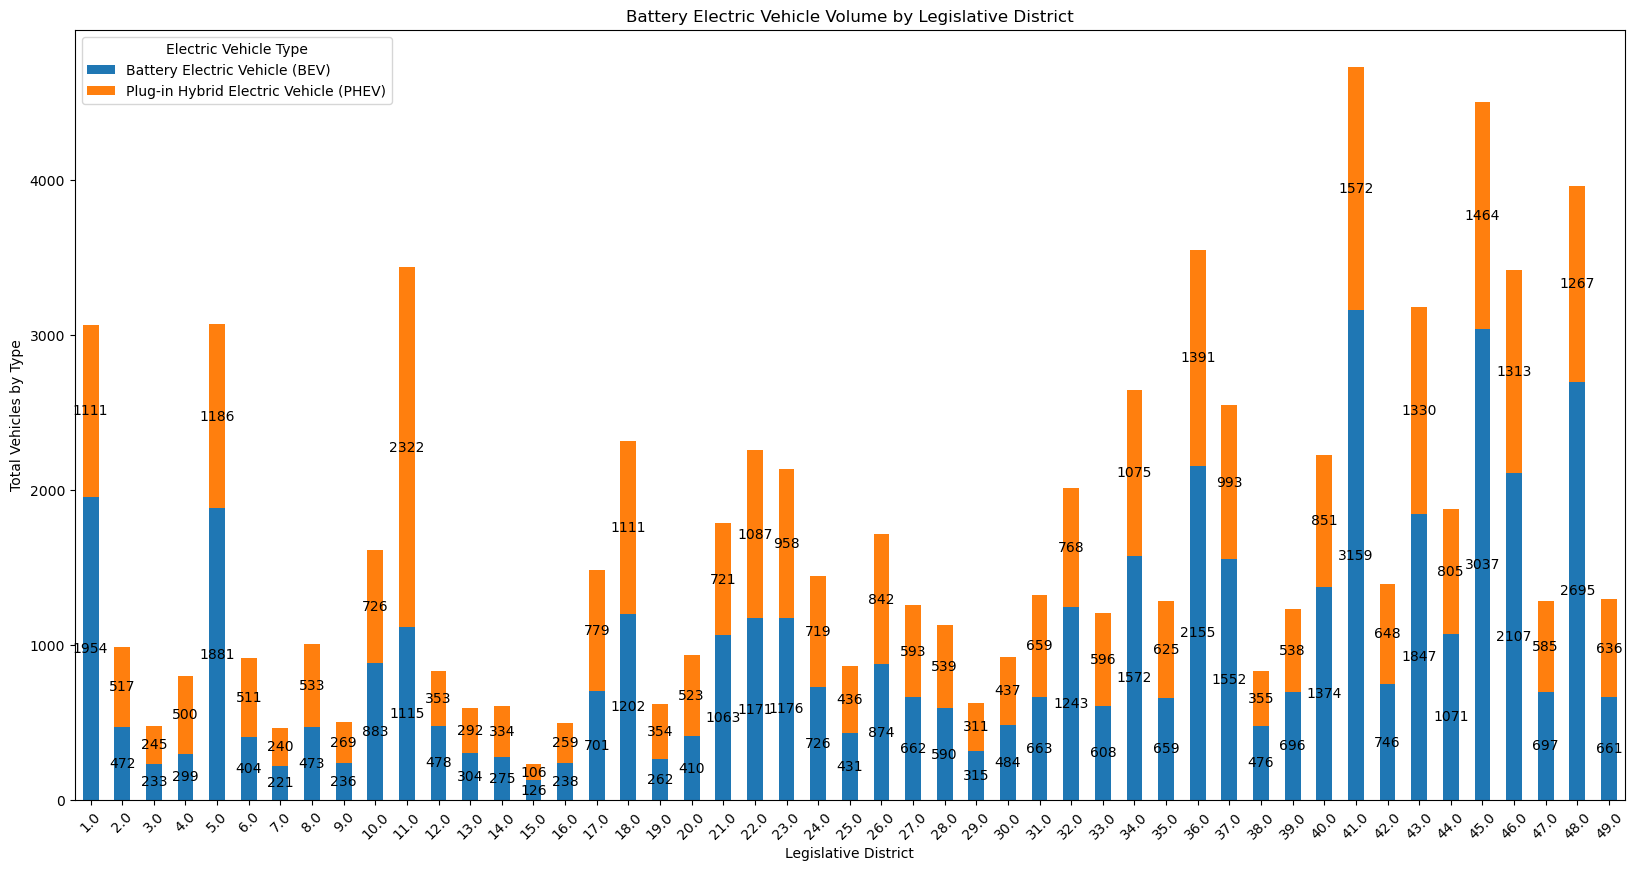

<Figure size 640x480 with 0 Axes>

In [38]:
# Create a bar plot showing Legistlative District and total vehicles by Electric Vehicle Type (2 types - BEV & PHEV)
EV_df = cleaned_df.pivot_table(index='Legislative District', columns='Electric Vehicle Type', aggfunc='size', fill_value=0)


fig, ax = plt.subplots(figsize=(20, 10))
EV_df.plot(kind='bar', stacked=True, ax=ax, rot=45)

# Add labels and title
plt.xlabel('Legislative District')
plt.ylabel('Total Vehicles by Type')
plt.title('Battery Electric Vehicle Volume by Legislative District')

for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.legend(title='Electric Vehicle Type')
plt.show()

plt.savefig("images/Total_BEV_PHEV_sales.png")

In [39]:
# Build new index with summarized data by Electric Vehicle Type
EV_count1 = cleaned_df.groupby('Legislative District')['Electric Vehicle Type'].agg(['count'])


print(EV_count1.sort_index())

                      count
Legislative District       
1.0                    3065
2.0                     989
3.0                     478
4.0                     799
5.0                    3067
6.0                     915
7.0                     461
8.0                    1006
9.0                     505
10.0                   1609
11.0                   3437
12.0                    831
13.0                    596
14.0                    609
15.0                    232
16.0                    497
17.0                   1480
18.0                   2313
19.0                    616
20.0                    933
21.0                   1784
22.0                   2258
23.0                   2134
24.0                   1445
25.0                    867
26.0                   1716
27.0                   1255
28.0                   1129
29.0                    626
30.0                    921
31.0                   1322
32.0                   2011
33.0                   1204
34.0                

In [40]:
# Summarize BEV totals by legislative distric
bev_counts = cleaned_df[cleaned_df['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)'].groupby('Legislative District').size()
bev_counts_df = pd.DataFrame(bev_counts, columns=['Total BEV'])
EV_count1 = EV_count1.merge(bev_counts_df, on='Legislative District', how='left')

EV_count1=EV_count1.sort_index()

print(EV_count1)

                      count  Total BEV
Legislative District                  
1.0                    3065       1954
2.0                     989        472
3.0                     478        233
4.0                     799        299
5.0                    3067       1881
6.0                     915        404
7.0                     461        221
8.0                    1006        473
9.0                     505        236
10.0                   1609        883
11.0                   3437       1115
12.0                    831        478
13.0                    596        304
14.0                    609        275
15.0                    232        126
16.0                    497        238
17.0                   1480        701
18.0                   2313       1202
19.0                    616        262
20.0                    933        410
21.0                   1784       1063
22.0                   2258       1171
23.0                   2134       1176
24.0                   14

In [41]:
# Summarize total PHEV vehicles by legislative district
phev_counts = cleaned_df[cleaned_df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)'].groupby('Legislative District').size()
phev_counts_df = pd.DataFrame(phev_counts, columns=['Total PHEV'])
EV_count1 = EV_count1.merge(phev_counts_df, on='Legislative District', how='left')

EV_count1=EV_count1.sort_index()

print(EV_count1)

                      count  Total BEV  Total PHEV
Legislative District                              
1.0                    3065       1954        1111
2.0                     989        472         517
3.0                     478        233         245
4.0                     799        299         500
5.0                    3067       1881        1186
6.0                     915        404         511
7.0                     461        221         240
8.0                    1006        473         533
9.0                     505        236         269
10.0                   1609        883         726
11.0                   3437       1115        2322
12.0                    831        478         353
13.0                    596        304         292
14.0                    609        275         334
15.0                    232        126         106
16.0                    497        238         259
17.0                   1480        701         779
18.0                   2313    

In [42]:
# Average range by each electric vehicle type
range_avg = cleaned_df.groupby(['Legislative District', 'Electric Vehicle Type'])['Electric Range'].mean().unstack()
range_avg.columns = ['Electric Range BEV', 'Electric Range PHEV']

EV_count1 = EV_count1.merge(range_avg, on='Legislative District', how='left')

EV_count1=EV_count1.sort_index()

print(EV_count1)

                      count  Total BEV  Total PHEV  Electric Range BEV  \
Legislative District                                                     
1.0                    3065       1954        1111          200.763050   
2.0                     989        472         517          199.194915   
3.0                     478        233         245          171.901288   
4.0                     799        299         500          195.080268   
5.0                    3067       1881        1186          207.123339   
6.0                     915        404         511          198.059406   
7.0                     461        221         240          204.493213   
8.0                    1006        473         533          204.695560   
9.0                     505        236         269          197.254237   
10.0                   1609        883         726          198.915062   
11.0                   3437       1115        2322          205.455605   
12.0                    831        478

In [43]:
# Summarize cleaned_df by BEV and PHEV 
BEV_df = cleaned_df.loc[cleaned_df['Electric Vehicle Type'] =='Battery Electric Vehicle (BEV)']
PHEV_df =cleaned_df.loc[cleaned_df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']


print(BEV_df.head())
print(PHEV_df.head())


   VIN (1-10)    County          City State  Postal Code  Model Year  \
0  3C3CFFGE4E    Yakima        Yakima    WA      98902.0        2014   
1  5YJXCBE40H  Thurston       Olympia    WA      98513.0        2017   
4  5YJ3E1EB8L      King          Kent    WA      98031.0        2020   
7  1G1FX6S01H    Kitsap       Poulsbo    WA      98370.0        2017   
8  5YJ3E1EA2J    Kitsap  Port Orchard    WA      98366.0        2018   

        Make    Model           Electric Vehicle Type  \
0       FIAT      500  Battery Electric Vehicle (BEV)   
1      TESLA  MODEL X  Battery Electric Vehicle (BEV)   
4      TESLA  MODEL 3  Battery Electric Vehicle (BEV)   
7  CHEVROLET  BOLT EV  Battery Electric Vehicle (BEV)   
8      TESLA  MODEL 3  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              87   
1           Clean Alternative Fuel Vehicle Eligible             200   
4          

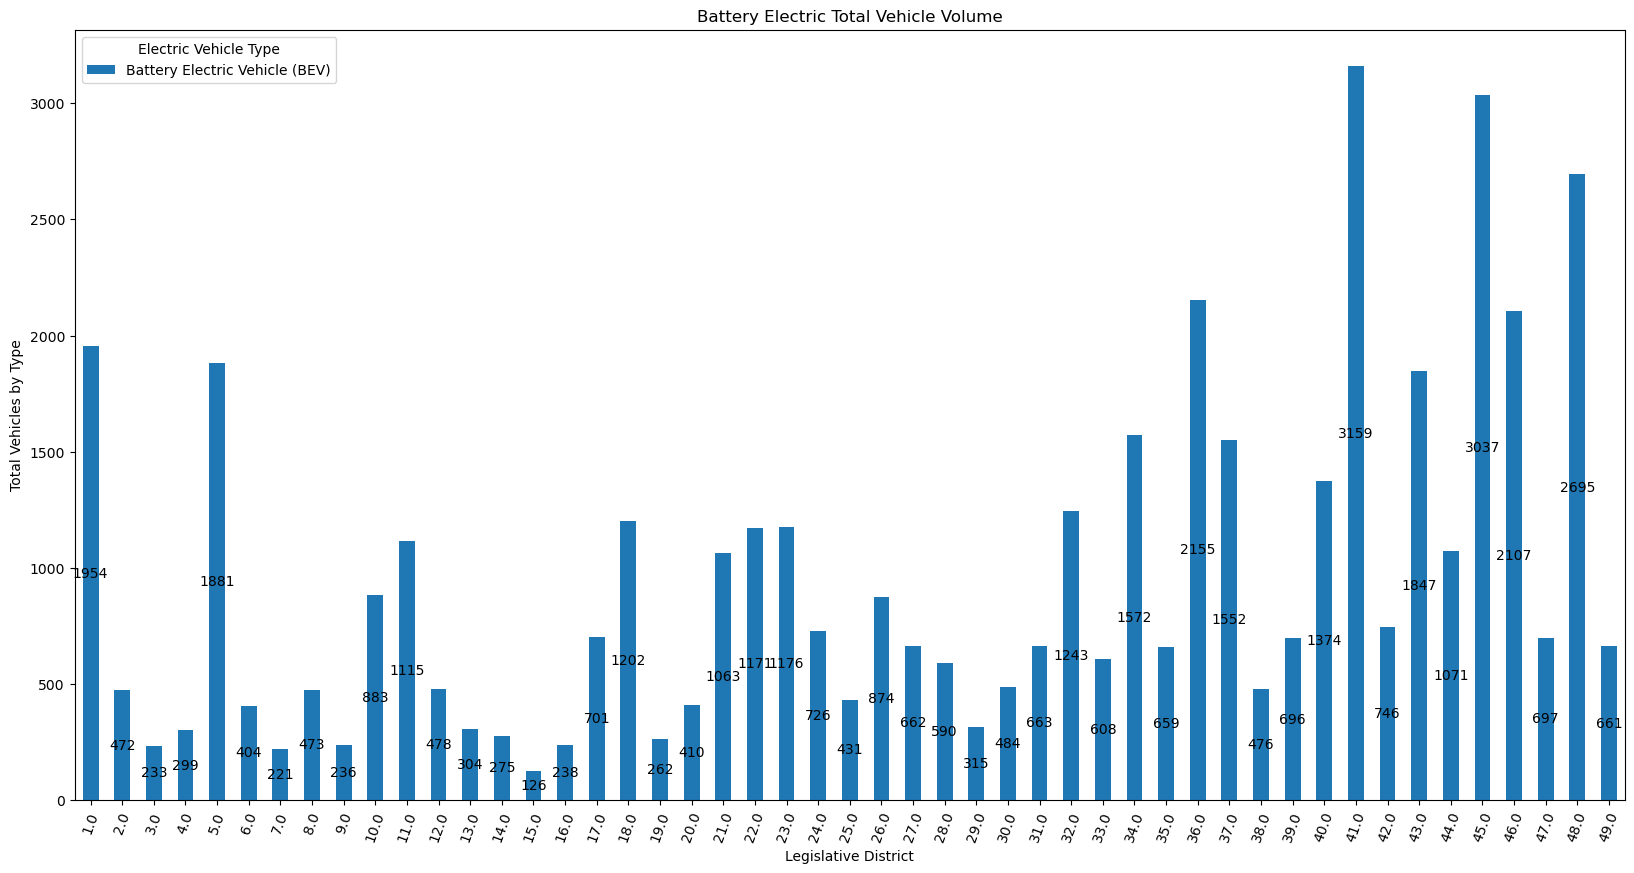

In [44]:
# Bar chart showing BEV totals by legislative district
BEV_count = BEV_df.pivot_table(index='Legislative District', columns='Electric Vehicle Type', aggfunc='size', fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
BEV_count.plot.bar(ax=ax, rot=70)


for container in ax.containers:
    ax.bar_label(container, label_type='center')
# Add labels and title
plt.title('Battery Electric Total Vehicle Volume')
plt.xlabel('Legislative District')
plt.ylabel('Total Vehicles by Type')

plt.savefig("images/Total_bev_sales.png")

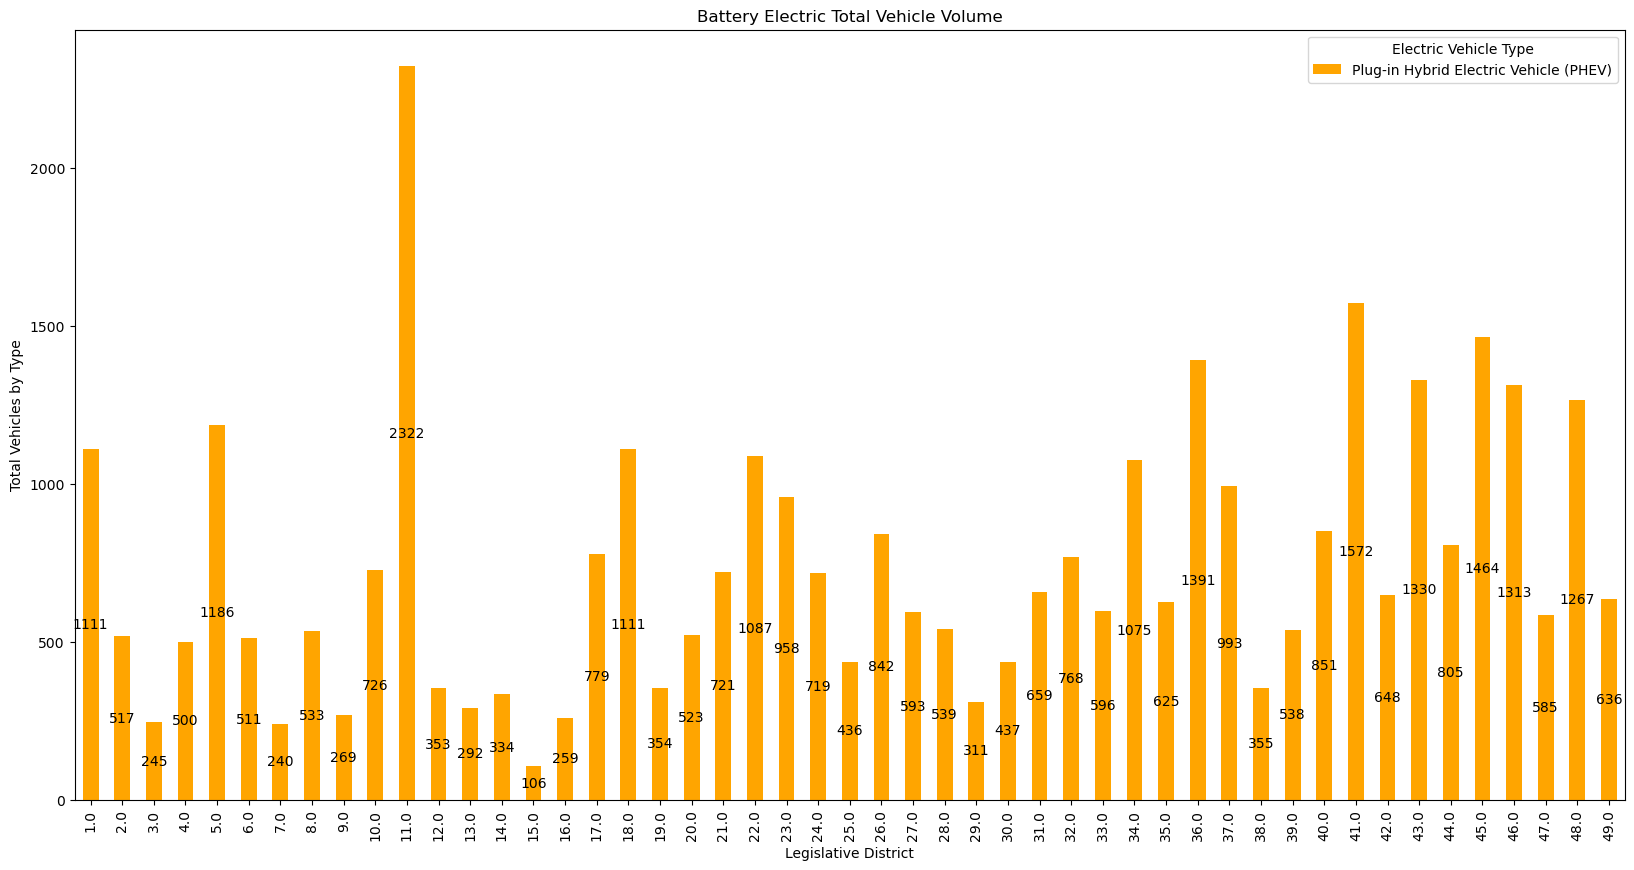

In [45]:
# Bar chart showing total PHEV by legislative district
PHEV_count = PHEV_df.pivot_table(index='Legislative District', columns='Electric Vehicle Type', aggfunc='size')

fig, ax = plt.subplots(figsize=(20, 10))
PHEV_count.plot.bar(ax=ax, color='orange', rot=90)

for container in ax.containers:
    ax.bar_label(container, label_type='center')
 
# Add labels and title
plt.title('Battery Electric Total Vehicle Volume')
plt.xlabel('Legislative District')
plt.ylabel('Total Vehicles by Type')

plt.savefig("images/Total_phev_sales.png")

In [46]:
#BEV correlation to total sales in each district
average_bev_mi = EV_count1.iloc[:,3]
bev_sales = EV_count1.iloc[:,1]
correlation = st.pearsonr(average_bev_mi,bev_sales)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.05


The correlation between both factors is 0.05


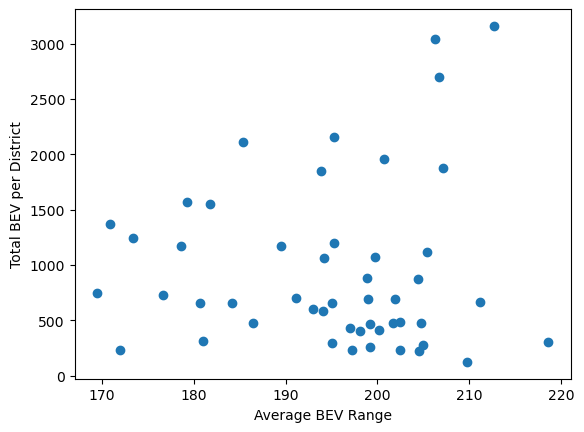

<Figure size 640x480 with 0 Axes>

In [47]:
#Same correlation with scatter plot
plt.scatter(average_bev_mi,bev_sales)
plt.xlabel('Average BEV Range')
plt.ylabel('Total BEV per District')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

plt.savefig("images/bev_range_district.png")

In [48]:
#PHEV correlation to total sales in each district
average_phev_mi = EV_count1.iloc[:,4]
phev_sales = EV_count1.iloc[:,2]
correlation = st.pearsonr(average_bev_mi,phev_sales)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.04


The correlation between both factors is 0.04


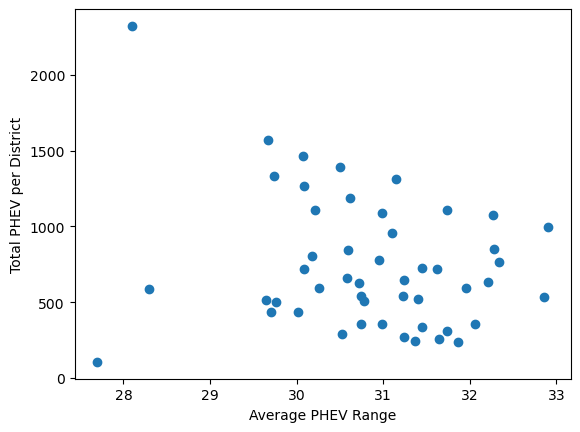

<Figure size 640x480 with 0 Axes>

In [49]:
#Same correlation with scatter plot
plt.scatter(average_phev_mi,phev_sales)
plt.xlabel('Average PHEV Range')
plt.ylabel('Total PHEV per District')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

plt.savefig("images/phev_range_district.png")

In [50]:
#PHEV correlation to total sales in each district
total_bev = EV_count1.iloc[:,2]
total_phev = EV_count1.iloc[:,3]
correlation = st.pearsonr(total_bev,total_phev)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.04


The correlation between both factors is 0.04


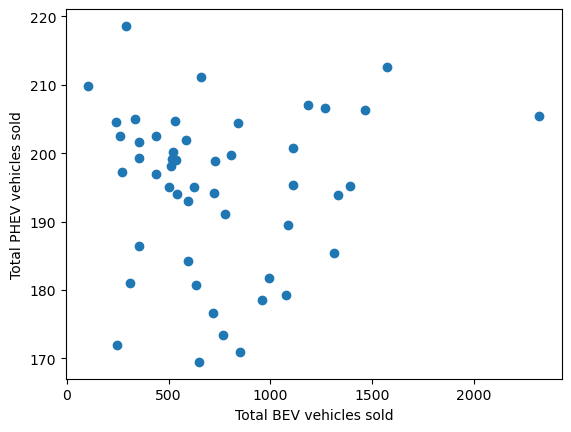

<Figure size 640x480 with 0 Axes>

In [51]:
plt.scatter(total_bev,total_phev)
plt.xlabel('Total BEV vehicles sold')
plt.ylabel('Total PHEV vehicles sold')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

plt.savefig("images/bev_phev_sales_corr.png")